In [24]:
%reload_ext autoreload
%autoreload 2

import os
from scipy.stats import truncnorm

import corner
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline   

from models_streams import *
from models_orbits import *
from priors import *
from utils import *
from mock_data import *
from likelihoods import *
from dynesty_fit import dynesty_fit
from corner_plots import *

In [57]:
q_mean, q_sig, nlive, sigma, N, seed = 1.0, 0.1, 4000, 5, 100, 41
PATH_SAVE  = f'/data/dc824-2/final_orbit_to_stream/q{q_mean}_qsig{q_sig}_seed{seed}_nlive{nlive}_sigma{sigma}'
id = 6
save_stream = f'{PATH_SAVE}/xx_{id+1:03d}'

with open(f'{save_stream}/dict_data.pkl', 'rb') as file:
        dict_data = pickle.load(file)
params_data = np.loadtxt(f'{save_stream}/params.txt')
theta_initial = dict_data['theta'][0]

In [58]:
model_info = {
    'model': gala_orbit_model_ndim12,
    'prior_transform': orbit_large_prior_transform_ndim12,
    'model_spline': orbit_spline,
    'log_likelihood': model_log_likelihood,
    'ndim': 12
}


In [59]:
p = np.random.uniform(size=model_info['ndim'])
params = model_info['prior_transform'](p)
logl = model_info['log_likelihood'](params, dict_data, model_info['model'], model_info['model_spline'], theta_initial)

In [60]:
nlive = 1000
dict_result = dynesty_fit(dict_data, 
                model_info['model'],
                model_info['model_spline'],
                model_info['log_likelihood'],
                model_info['prior_transform'],
                ndim=model_info['ndim'], nlive=nlive, theta_initial=theta_initial)

58489it [06:41, 145.51it/s, batch: 1 | bound: 10 | nc: 1 | ncall: 5234572 | eff(%):  1.100 | loglstar: -320.761 < -313.263 < -317.208 | logz: -364.063 +/-  0.216 | stop:  0.631]            


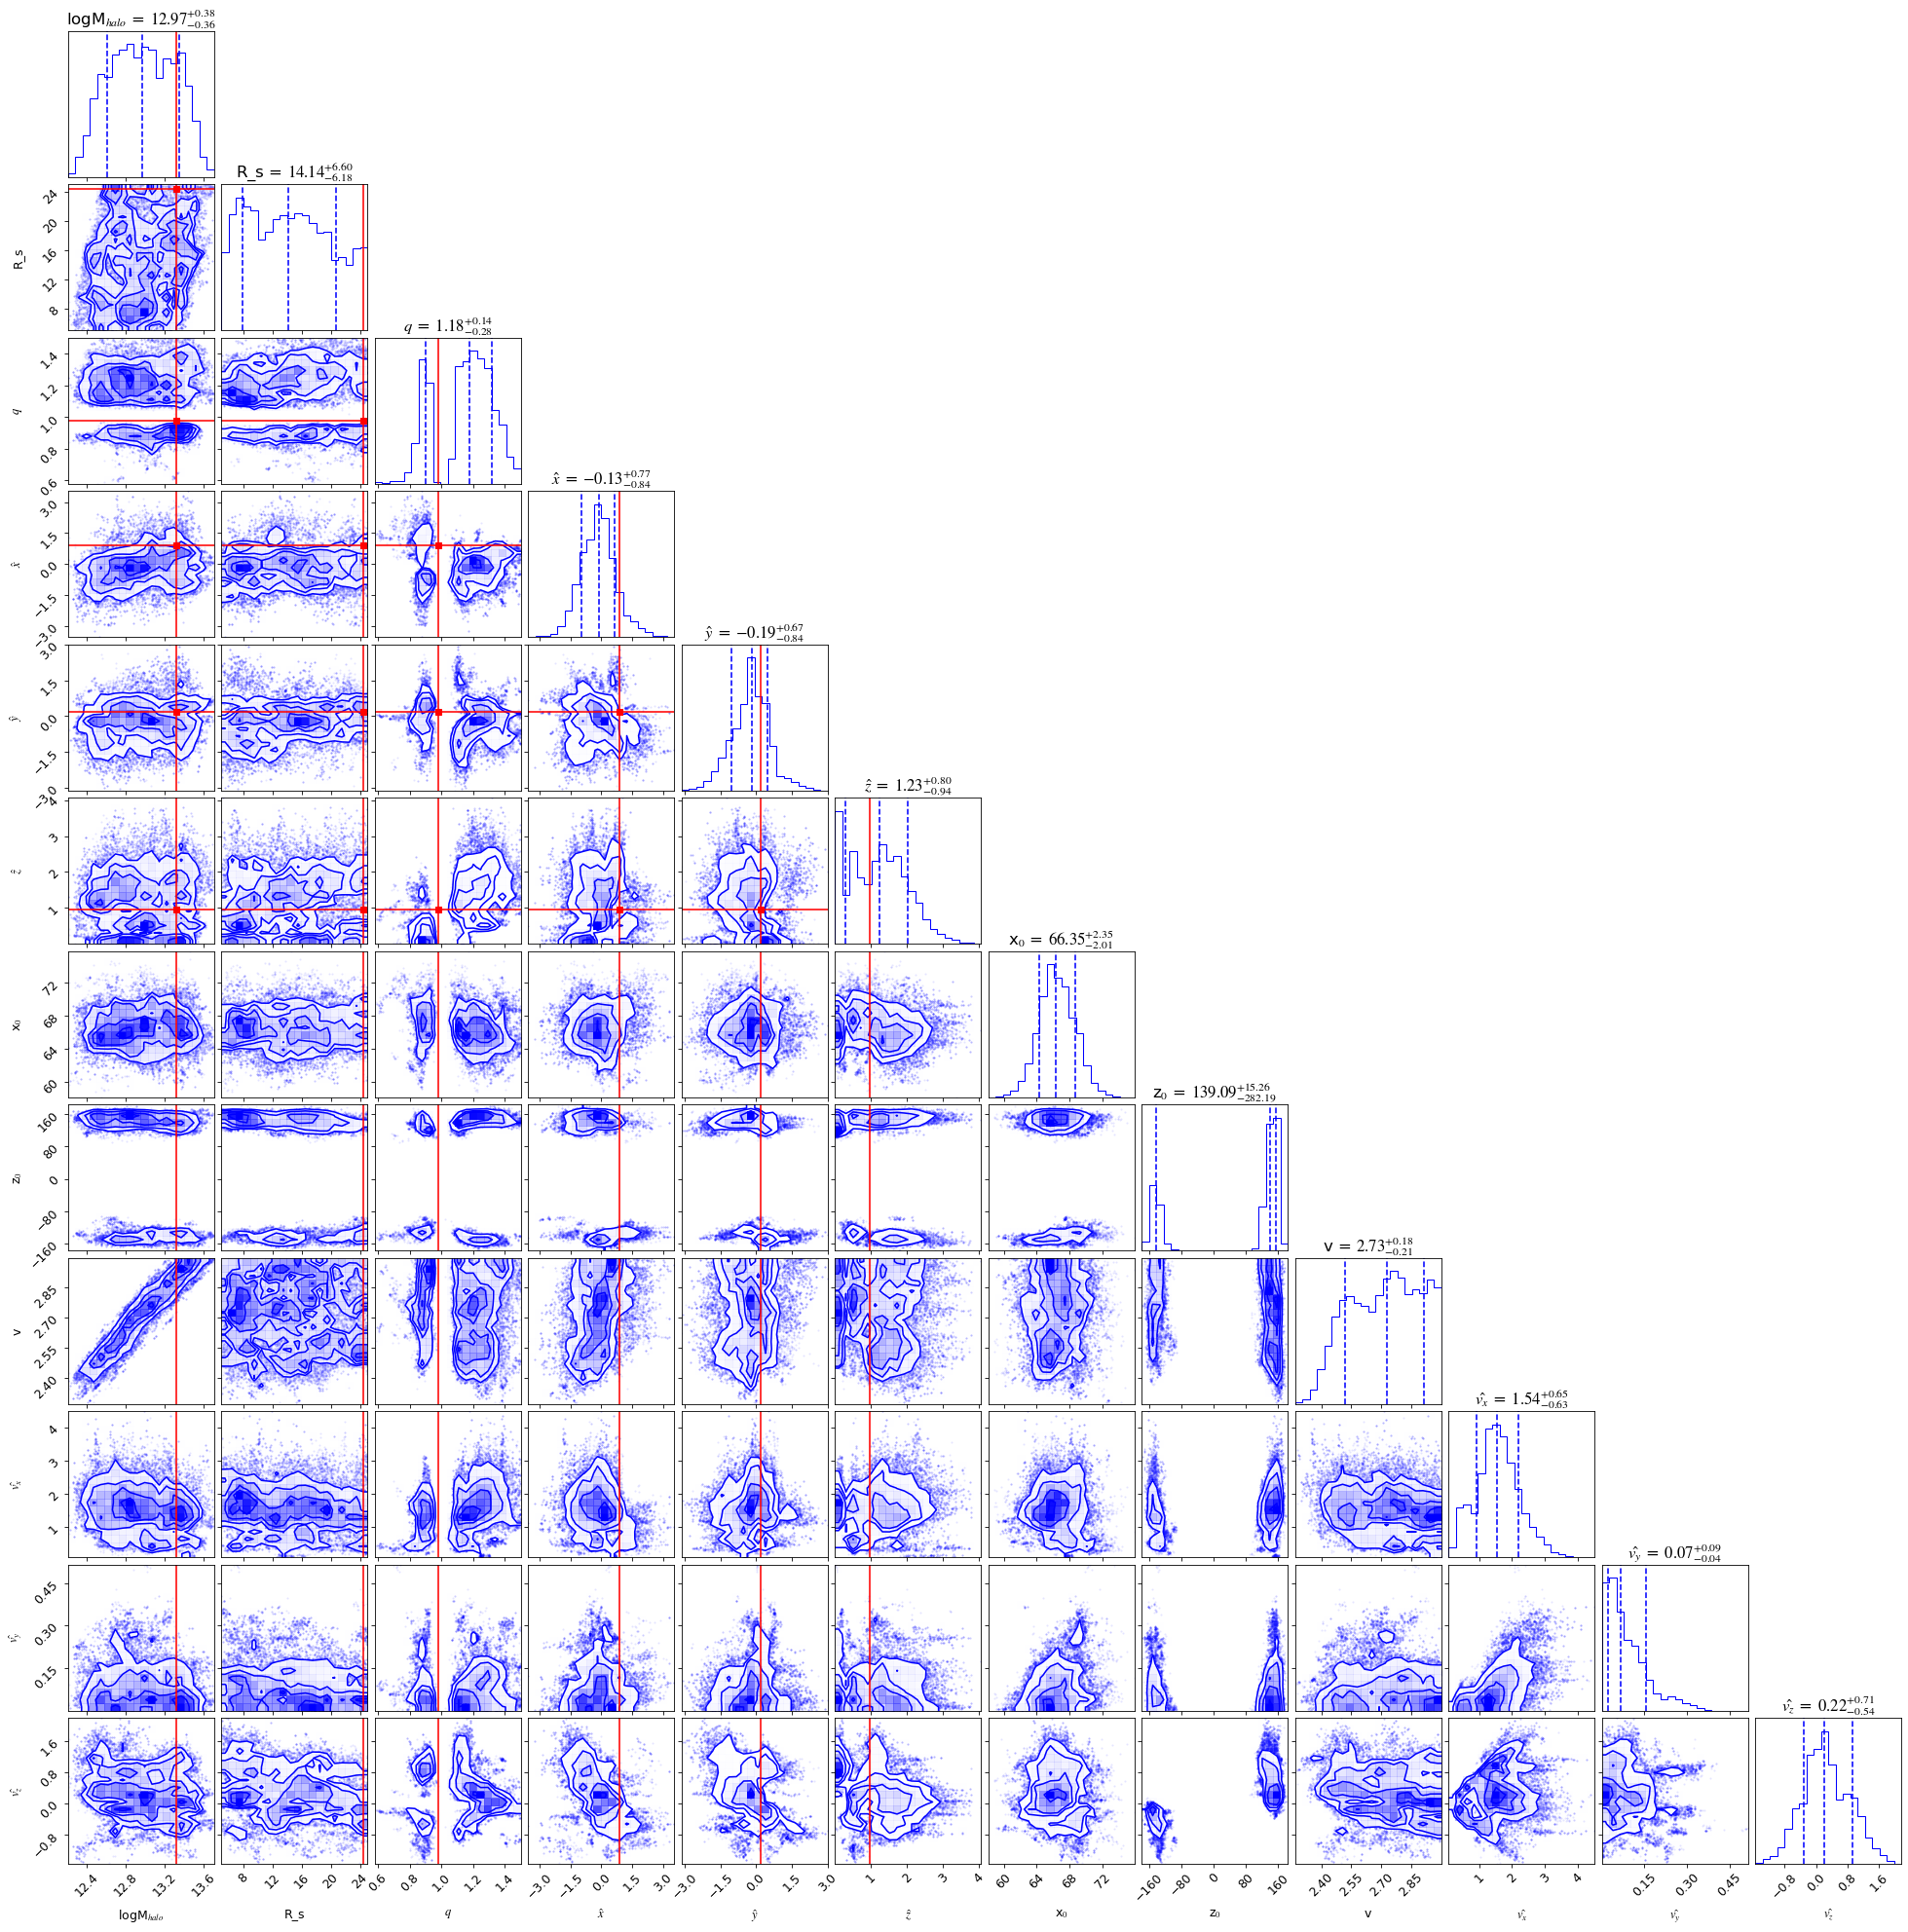

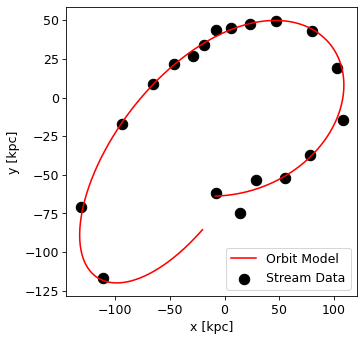

In [ ]:
from corner_plots import *
labels=[r'logM$_{halo}$', r'R_s', r'$q$', r'$\hat{x}$', r'$\hat{y}$', r'$\hat{z}$', 
                                r'x$_0$', r'z$_0$', r'v', r'$\hat{v_x}$', r'$\hat{v_y}$', r'$\hat{v_z}$']
ground_truth = np.concatenate([params_data[:6], np.zeros(6)+np.nan])    

figure = corner.corner(dict_result['samps'], 
            labels=labels,
            color='blue',
            quantiles=[0.16, 0.5, 0.84],
            show_titles=True, 
            title_kwargs={"fontsize": 16},
            truths=ground_truth, 
            truth_color='red')


plt.figure(figsize=(5, 5))
plt.xlabel(r'x [kpc]')
plt.ylabel(r'y [kpc]')
xyz_model, xyz_prog = model_info['model'](dict_result['samps'][np.argmax(dict_result['logl'])], theta_initial=theta_initial)
x_model, y_model = xyz_model[:,0], xyz_model[:,1]
plt.plot(x_model, y_model, color='red', label='Orbit Model')
plt.scatter(dict_data['x'], dict_data['y'], s=100, color='k', label='Stream Data')
plt.legend(loc='best')

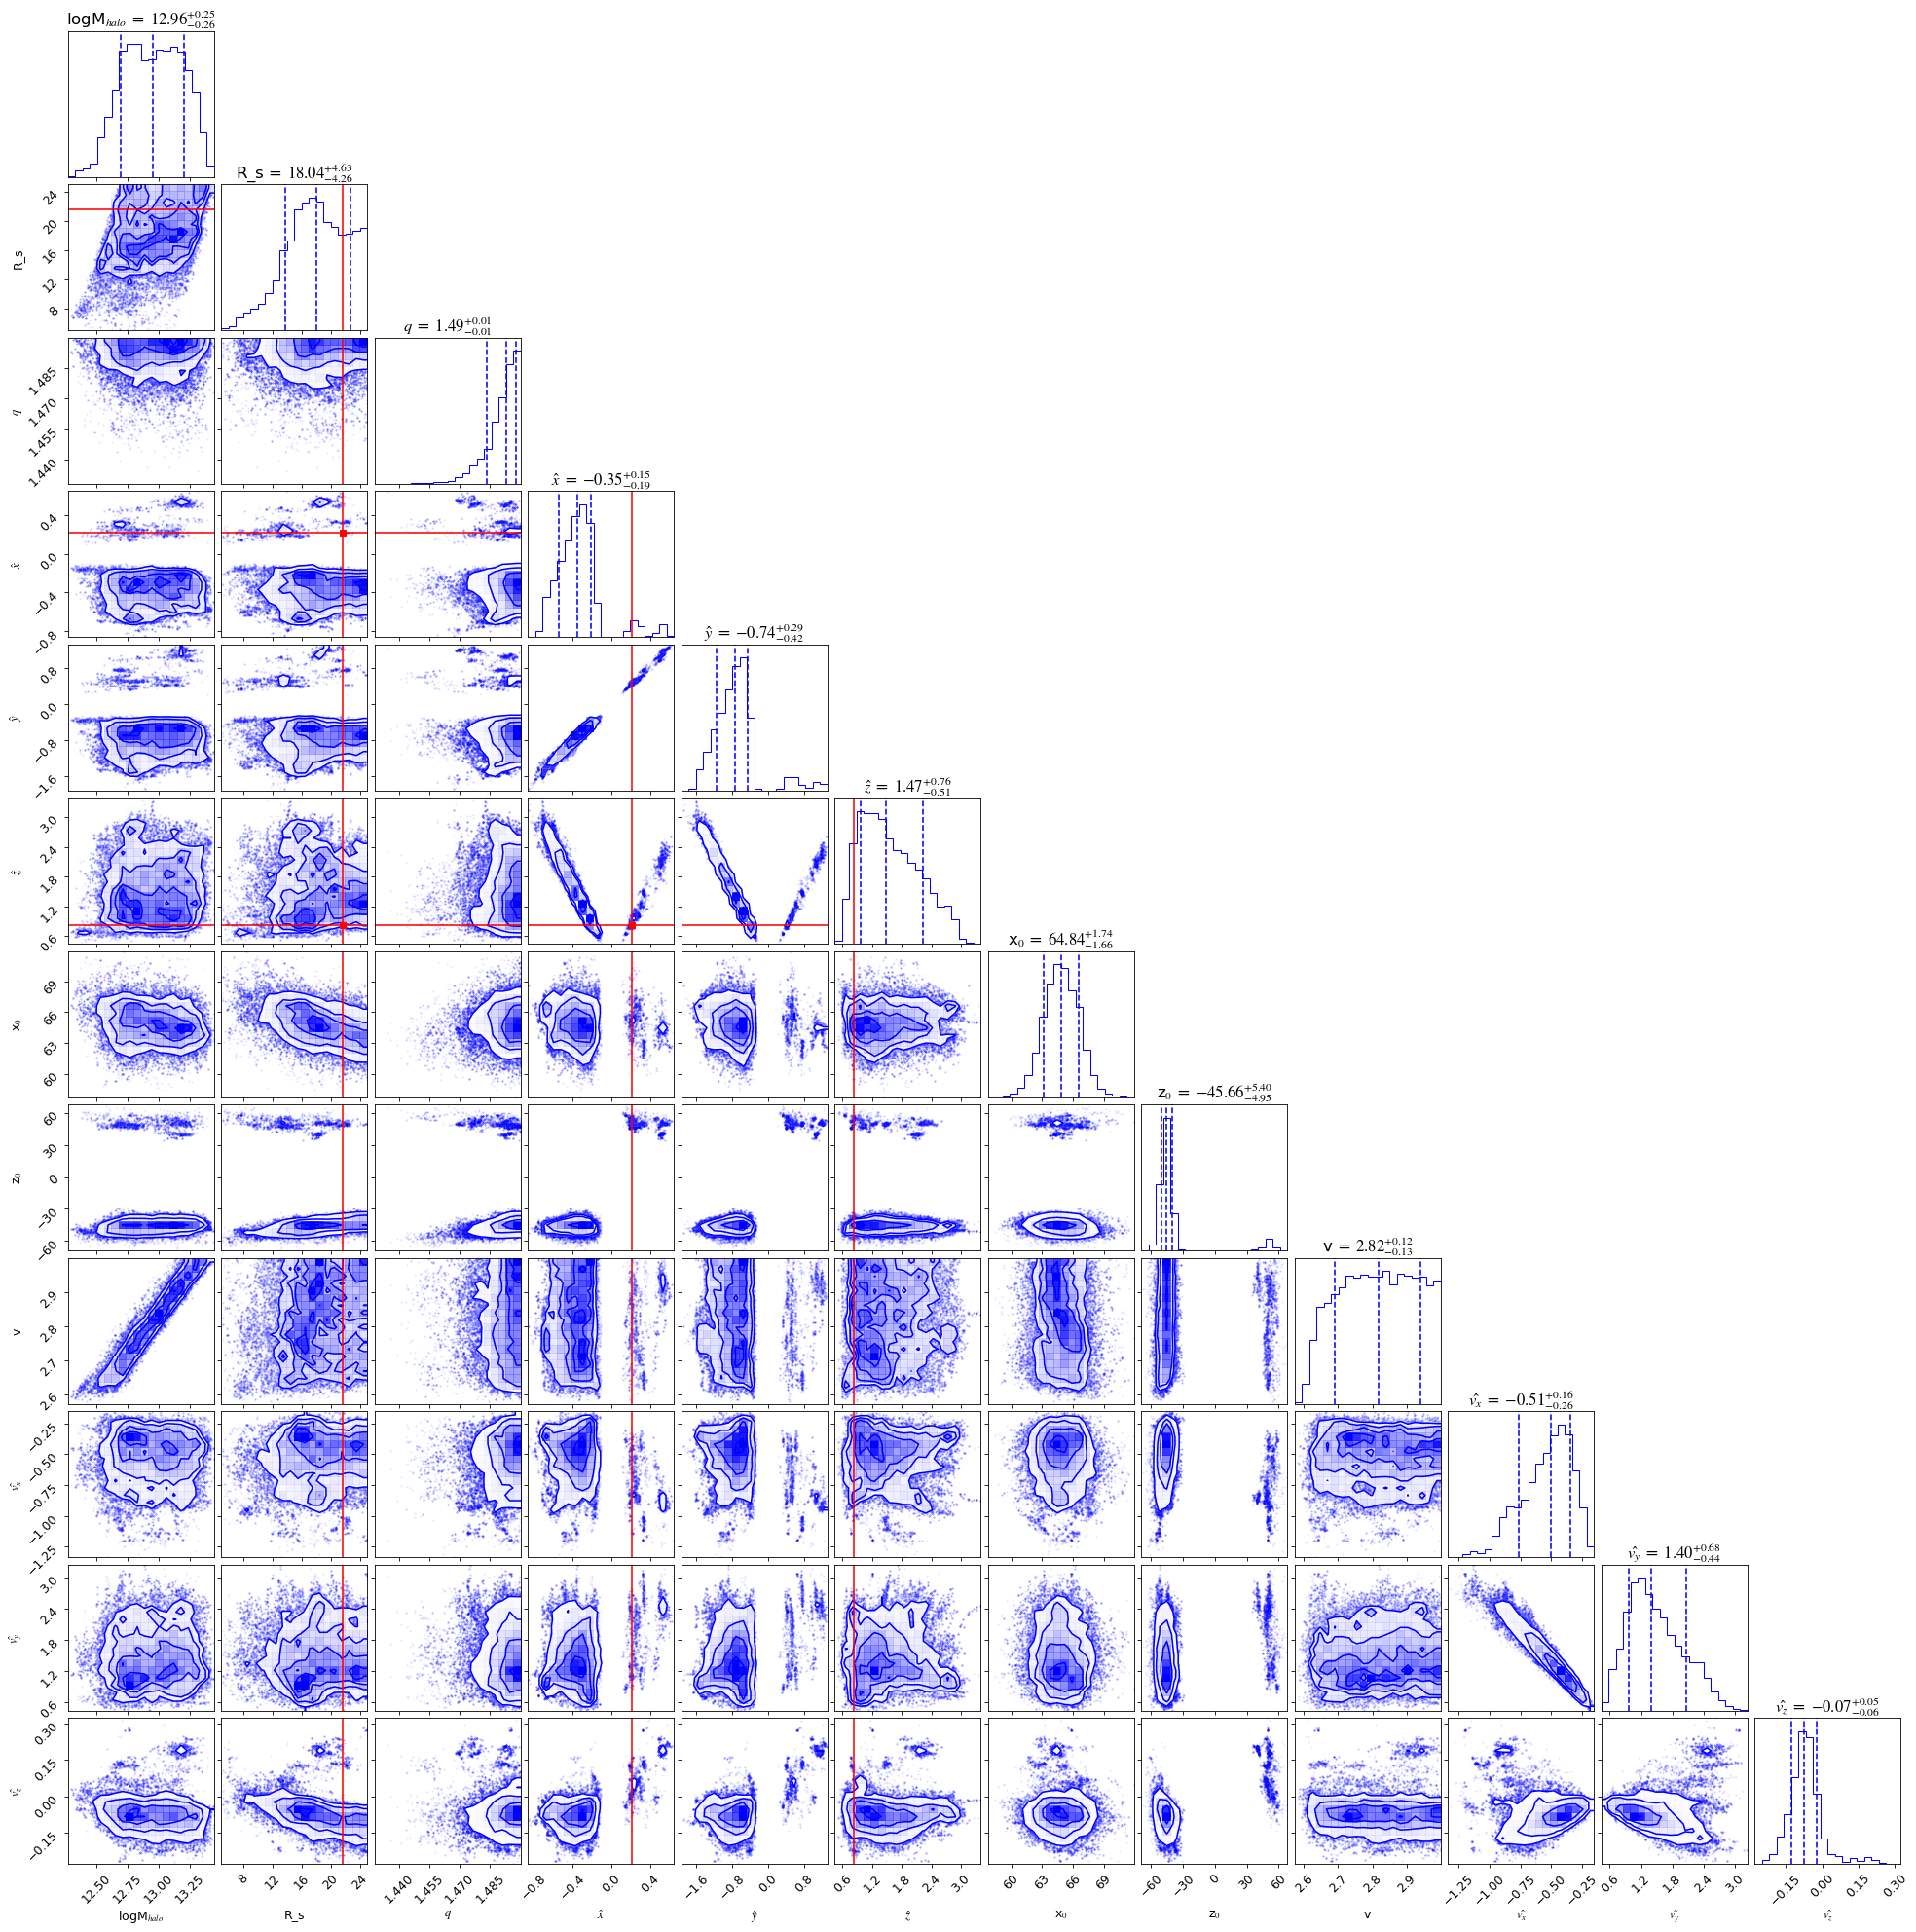

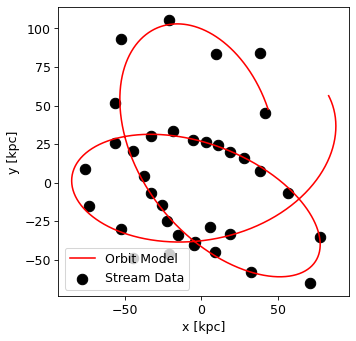

In [55]:
from corner_plots import *
labels=[r'logM$_{halo}$', r'R_s', r'$q$', r'$\hat{x}$', r'$\hat{y}$', r'$\hat{z}$', 
                                r'x$_0$', r'z$_0$', r'v', r'$\hat{v_x}$', r'$\hat{v_y}$', r'$\hat{v_z}$']
ground_truth = np.concatenate([params_data[:6], np.zeros(6)+np.nan])    

figure = corner.corner(dict_result['samps'], 
            labels=labels,
            color='blue',
            quantiles=[0.16, 0.5, 0.84],
            show_titles=True, 
            title_kwargs={"fontsize": 16},
            truths=ground_truth, 
            truth_color='red')


plt.figure(figsize=(5, 5))
plt.xlabel(r'x [kpc]')
plt.ylabel(r'y [kpc]')
xyz_model, xyz_prog = model_info['model'](dict_result['samps'][np.argmax(dict_result['logl'])], theta_initial=theta_initial)
x_model, y_model = xyz_model[:,0], xyz_model[:,1]
plt.plot(x_model, y_model, color='red', label='Orbit Model')
plt.scatter(dict_data['x'], dict_data['y'], s=100, color='k', label='Stream Data')
plt.legend(loc='best')

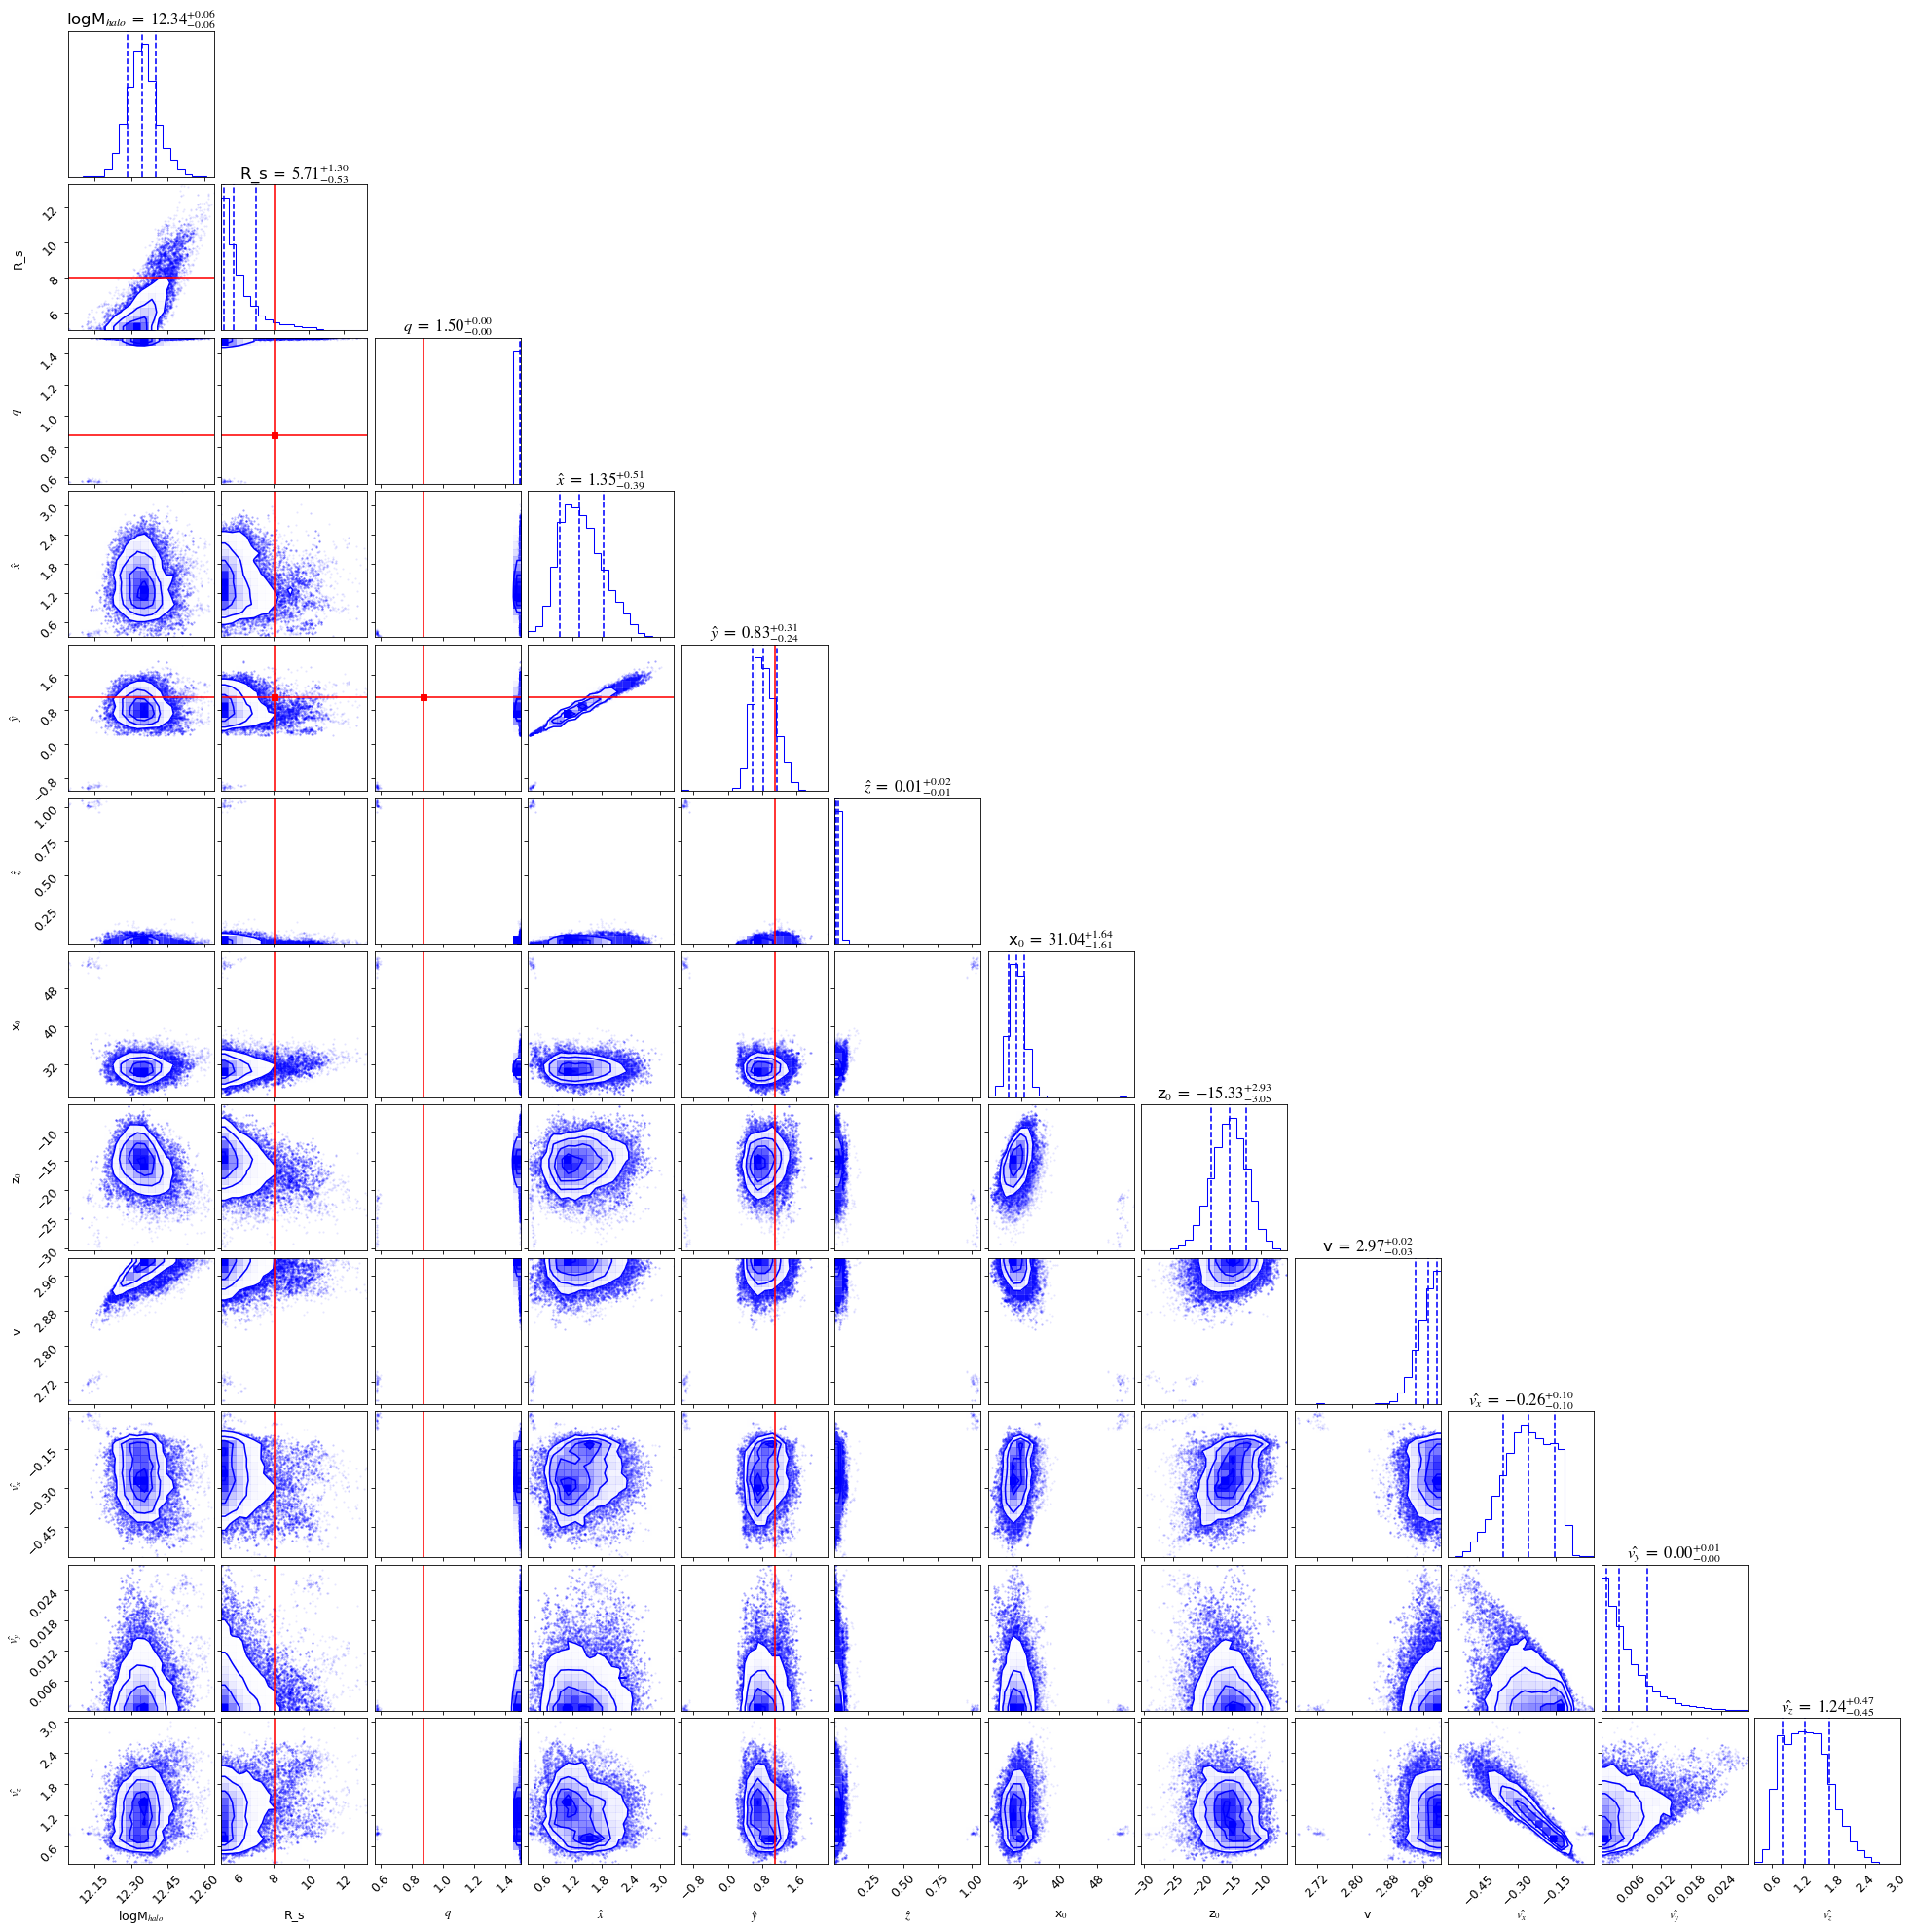

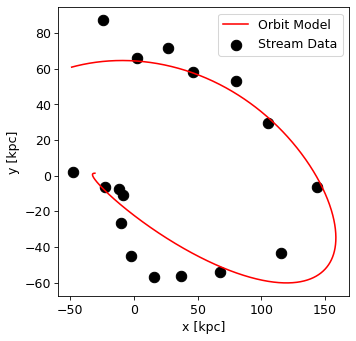

In [61]:
from corner_plots import *
labels=[r'logM$_{halo}$', r'R_s', r'$q$', r'$\hat{x}$', r'$\hat{y}$', r'$\hat{z}$', 
                                r'x$_0$', r'z$_0$', r'v', r'$\hat{v_x}$', r'$\hat{v_y}$', r'$\hat{v_z}$']
ground_truth = np.concatenate([params_data[:6], np.zeros(6)+np.nan])    

figure = corner.corner(dict_result['samps'], 
            labels=labels,
            color='blue',
            quantiles=[0.16, 0.5, 0.84],
            show_titles=True, 
            title_kwargs={"fontsize": 16},
            truths=ground_truth, 
            truth_color='red')


plt.figure(figsize=(5, 5))
plt.xlabel(r'x [kpc]')
plt.ylabel(r'y [kpc]')
xyz_model, xyz_prog = model_info['model'](dict_result['samps'][np.argmax(dict_result['logl'])], theta_initial=theta_initial)
x_model, y_model = xyz_model[:,0], xyz_model[:,1]
plt.plot(x_model, y_model, color='red', label='Orbit Model')
plt.scatter(dict_data['x'], dict_data['y'], s=100, color='k', label='Stream Data')
plt.legend(loc='best')